# Wine Data Analysis

## Part I)  A) Load the library

In [3]:
# Import required libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from wordcloud import WordCloud

## Part I) B) Read the data

In [5]:
# Load the data from your file or data source

In [6]:
wine_df=pd.read_csv('winequalityN.csv')
print('Wine Data Analysis')
wine_df

Wine Data Analysis


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset was downloaded from the UCI Machine Learning Repository.
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The
reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and
sensory (the output) variables are available (e.g. there is no data about grape types, wine brand,
wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not
balanced (e.g. there are much more normal wines than excellent or poor ones). Outlier detection
algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input
variables are relevant. So it could be interesting to test feature selection methods.
Two datasets were combined and few values were randomly removed.

Attribute Information:
For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [7]:
# Show first 5 rows

In [8]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
# Show last 5 rows

In [10]:
wine_df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
# Show the info for data

In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
# Show the columns

In [14]:
wine_df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [15]:
# Check shape and length of data

In [16]:
wine_df.shape , len(wine_df)

((6497, 13), 6497)

In [17]:
# Show the description summary for numerical and categorical values.

In [18]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
wine_df.describe(include='O')

,type
count,6497
unique,2
top,white
freq,4898


In [20]:
wine_df.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


## Part II) Exploratory Data Analysis

## Part II) A) Do Numerical Analysis of Columns

### Analysis of alcohol column

In [21]:
wine_df['alcohol'].min()

8.0

In [22]:
wine_df['alcohol'].max()

14.9

In [23]:
wine_df['alcohol'].mean()

10.491800831149455

In [24]:
wine_df['alcohol'].median()

10.3

In [25]:
wine_df['alcohol'].std()

1.1927117488689747

In [26]:
wine_df['alcohol'].var()

1.4225613158900883

In [27]:
wine_df['alcohol'].skew()

0.5657177290960251

#### What is the range of alcohol value?

In [28]:
# Histogram plot

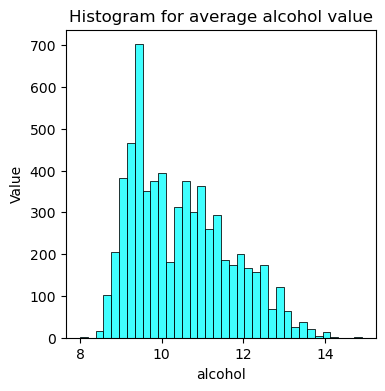

In [29]:
plt.figure(figsize=(4,4))
sns.histplot(wine_df['alcohol'],color='cyan')
plt.title('Histogram for average alcohol value')
plt.ylabel('Value')
plt.show()

In [30]:
# Distribution plot

<Figure size 300x300 with 0 Axes>

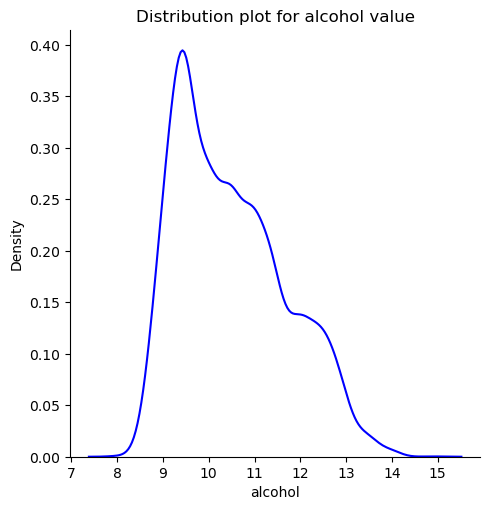

In [31]:
plt.figure(figsize=(3,3))
sns.displot(wine_df['alcohol'], kind='kde', color='blue')
plt.title('Distribution plot for alcohol value')
plt.show()

#### Are there any extreme alcohol values in data?

In [32]:
wine_df['alcohol'].quantile(0.10),wine_df['alcohol'].quantile(0.25), wine_df['alcohol'].quantile(0.50), wine_df['alcohol'].quantile(0.75), wine_df['alcohol'].quantile(0.90)

(9.1, 9.5, 10.3, 11.3, 12.3)

In [33]:
# Box plot

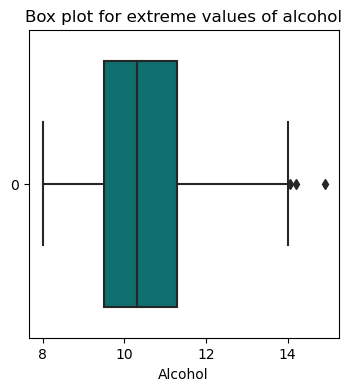

In [34]:
plt.figure(figsize=(4,4))
sns.boxplot(wine_df['alcohol'], color='teal', orient="h")
plt.title('Box plot for extreme values of alcohol')
plt.xlabel('Alcohol')
plt.show()

In [35]:
# Conclusion

**Alcohol** column has a asymmetrical distribution with skewness of 0.56 which is between -0.5 and 0.5 . 
- Range of alcohol value is from minimum 8 and maximum 14.9.
- It's mean value is 10.4 and median value is 10.3.
- Standard deviation for alcohol column is 1.19 and variance for this column is 1.42.
- Most of the value is falling between 9-13.

- 10% of alcohol values are 9.1 and below.
- 25% of alcohol values are 9.5 and below.
- 50% of alcohol values are 10.3 and below.
- 75% of alcohol values are 11.3 and below.
- 90% of alcohol values are 12.3 and below.
- Alcohol column has some extreme values.

Alcohol column could be a good predictor for checking quality of wine and it's relation with other columns should 
be explored further.

## Part II) B) Do Categortical  Analysis of Columns

In [36]:
# Count values

In [37]:
wine_df['type'].value_counts().sort_values(ascending=True)

type
red      1599
white    4898
Name: count, dtype: int64

In [38]:
# Percentage of these count values

In [39]:
wine_df['type'].value_counts(normalize=True)*100

type
white    75.388641
red      24.611359
Name: proportion, dtype: float64

In [40]:
# Piechart

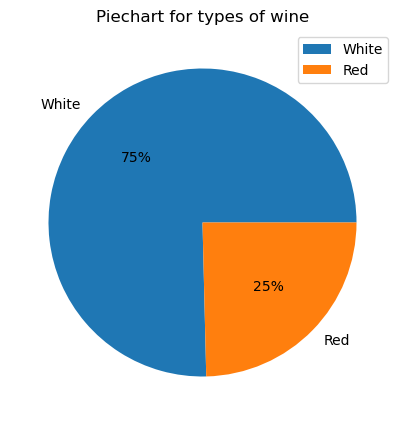

In [41]:
plt.figure(figsize=(5,5))
sizes=(75.38, 24.61)
plt.pie(sizes,labels=['White', 'Red'], autopct='%1.0f%%')
plt.title('Piechart for types of wine')
plt.legend()
plt.show()

In [42]:
# Countplot

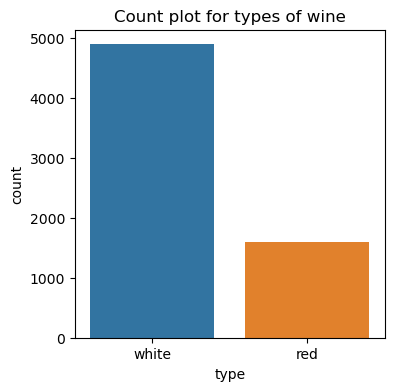

In [43]:
plt.figure(figsize=(4,4))
sns.countplot(x=wine_df['type'])
plt.title('Count plot for types of wine')
plt.show()

In [44]:
# To find no. of unique values

In [45]:
wine_df['type'].nunique()

2

In [46]:
# To find what are those unique values

In [47]:
wine_df['type'].unique()

array(['white', 'red'], dtype=object)

In [48]:
# Word cloud

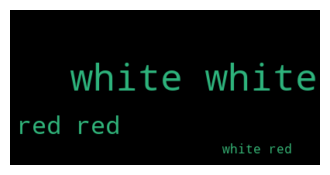

In [49]:
from wordcloud import WordCloud

plt.figure(figsize=(4,4)) 
text = " ".join(wine_df['type'].to_list())
wordcloud = WordCloud().generate_from_text(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [50]:
# Conclusion

- Here, we have 2 types of wines namely white and red.
- As their are only 2 types, so this **type** column has very low cardinality.
- White wine is present is more amount as compared to the red wine, i.e., 75.38% of white and 24.61% of red wine is present.

## Part II) C) Combine Numerical and Categorical columns for analysis

In [51]:
# Correlation of numerical and categorical data

In [52]:
data=wine_df[['alcohol','quality']].corr()
data

,alcohol,quality
alcohol,1.000000,0.444319
quality,0.444319,1.000000


In [53]:
# Heatmap

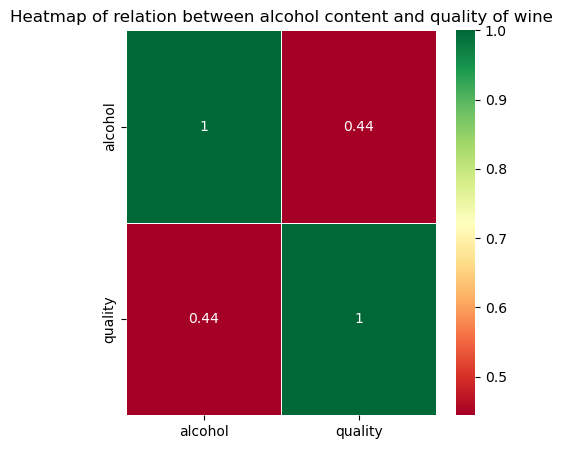

In [54]:
plt.figure(figsize=(5,5))
sns.heatmap(data, cmap='RdYlGn', annot=True, linewidth=.5)
plt.title('Heatmap of relation between alcohol content and quality of wine')
plt.show()

In [55]:
# Scatterplot

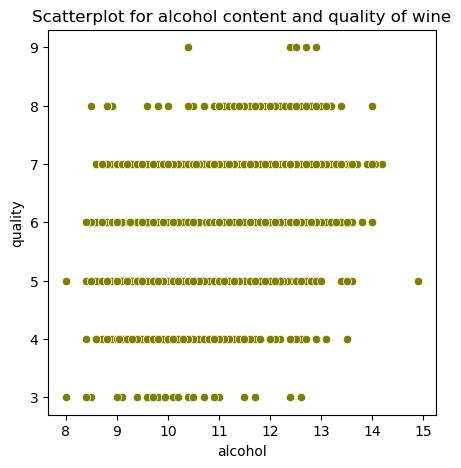

In [56]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=wine_df, x='alcohol', y='quality', color='olive')
plt.title('Scatterplot for alcohol content and quality of wine')
plt.show()

In [57]:
# Regplot

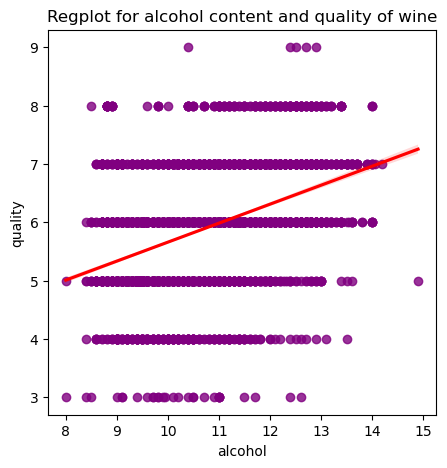

In [58]:
plt.figure(figsize=(5,5))
sns.regplot(data=wine_df, x='alcohol', y='quality', scatter_kws={'color':'purple'}, line_kws={'color':'red'})
plt.title('Regplot for alcohol content and quality of wine')
plt.show()

## Part II) D) Add your own Questions

<Figure size 500x500 with 0 Axes>

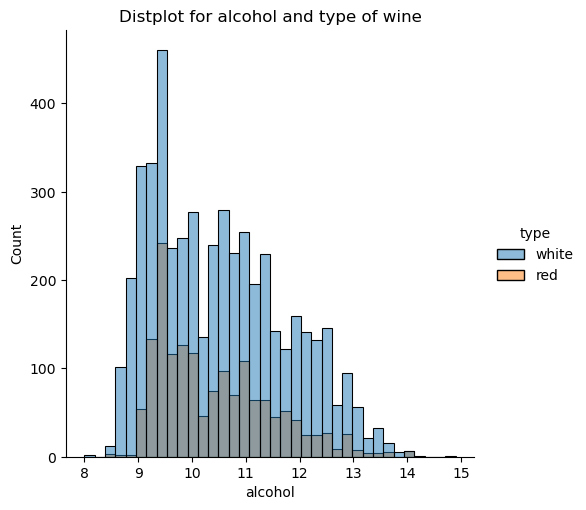

In [59]:
# Q1 What is relation between alcohol and type?
plt.figure(figsize=(5,5))
sns.displot(data=wine_df, x='alcohol', hue='type')
plt.title('Distplot for alcohol and type of wine')
plt.show()

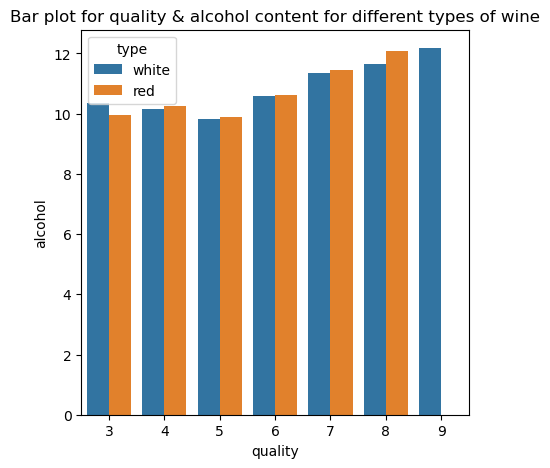

In [60]:
# Q2 What is the quality of different types wine along with different alcohol content?
plt.figure(figsize=(5,5))
sns.barplot(data=wine_df, x="quality", y="alcohol",hue='type',errorbar=None)
plt.title('Bar plot for quality & alcohol content for different types of wine')
plt.show()

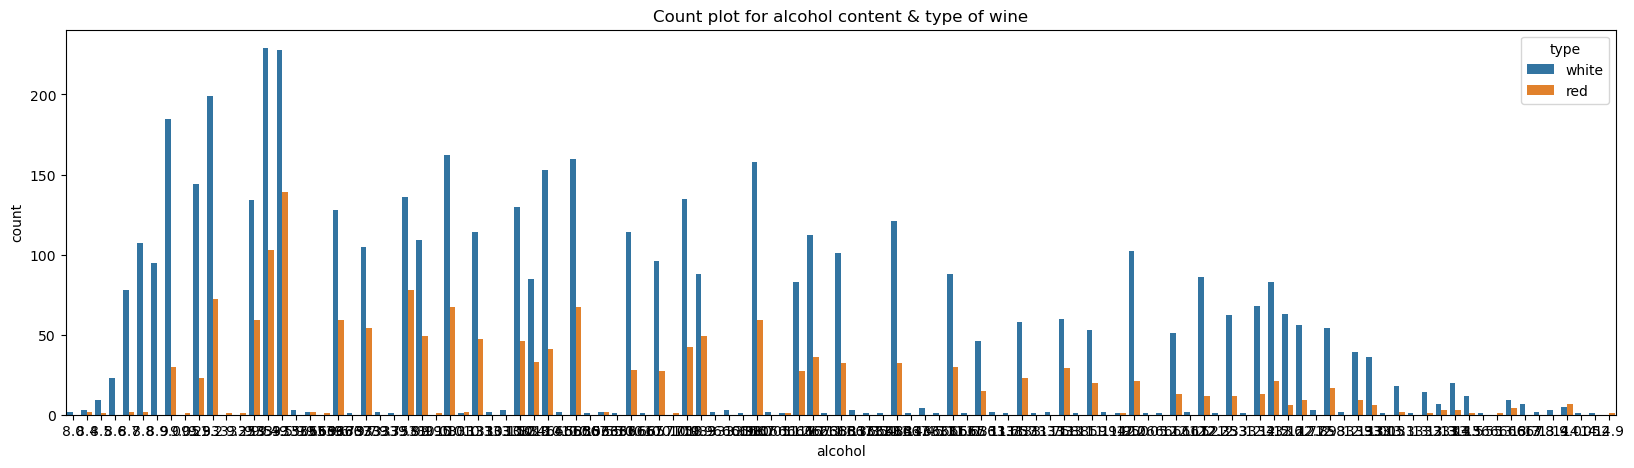

In [61]:
# Q3 What is the count of the total rental bikes during the different seasons?
plt.figure(figsize=(20,5))
sns.countplot(data=wine_df, x='alcohol', hue='type')
plt.title('Count plot for alcohol content & type of wine')
plt.show()

# Part III) Data Cleaning

## Part III) A) Handling Duplicate data

In [62]:
# Check shape of original data

In [63]:
wine_df.shape

(6497, 13)

In [64]:
# Drop duplicate values and reset your index columns.

In [65]:
wine_df.drop_duplicates(inplace=True, keep='first')
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [66]:
# Check shape after applying drop duplicates

In [67]:
wine_df.shape

(5329, 13)

In [68]:
# Conclusion

- When we applied drop duplicates on our dataframe, the size of dataframe changed from 6497 to 5329 which means 1168 duplicate values.

## Part III) B)  Handling Missing Values

In [69]:
# Apply isnull() function and find the sum of missing values in all columns.

In [70]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [71]:
# Find missing value in % form.

In [72]:
wine_df.isnull().sum()/len(wine_df)*100

type                    0.000000
fixed acidity           0.187652
volatile acidity        0.150122
citric acid             0.056296
residual sugar          0.037530
chlorides               0.037530
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.168887
sulphates               0.075061
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [73]:
# Substitue values in missing columns using mean of each column

In [74]:
wine_df['fixed acidity'].fillna(7.21, inplace=True)
wine_df['volatile acidity'].fillna(0.34, inplace=True)
wine_df['citric acid'].fillna(0.31, inplace=True)
wine_df['residual sugar'].fillna(5.05, inplace=True)
wine_df['chlorides'].fillna(0.05, inplace=True)
wine_df['pH'].fillna(3.22,inplace=True)
wine_df['sulphates'].fillna(0.53, inplace=True)

wine_df.isnull().sum() #cross-verify

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [75]:
# Conclusion

- As missing values are less than 30%, so we substituted these missing values by calculating mean of each column.
- As all columns are necessary, we didn't drop any column.

## Part III) C) Handling Outliers 

In [76]:
# Box plot

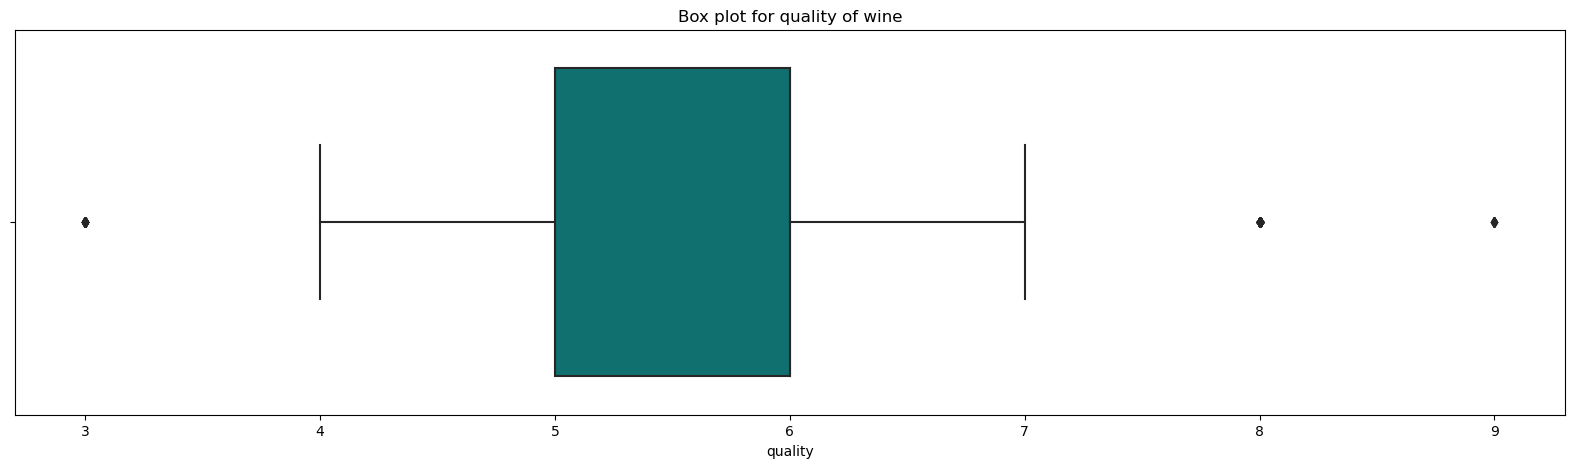

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x=wine_df['quality'], color='teal')
plt.title('Box plot for quality of wine')
plt.show()

In [78]:
# Violin plot

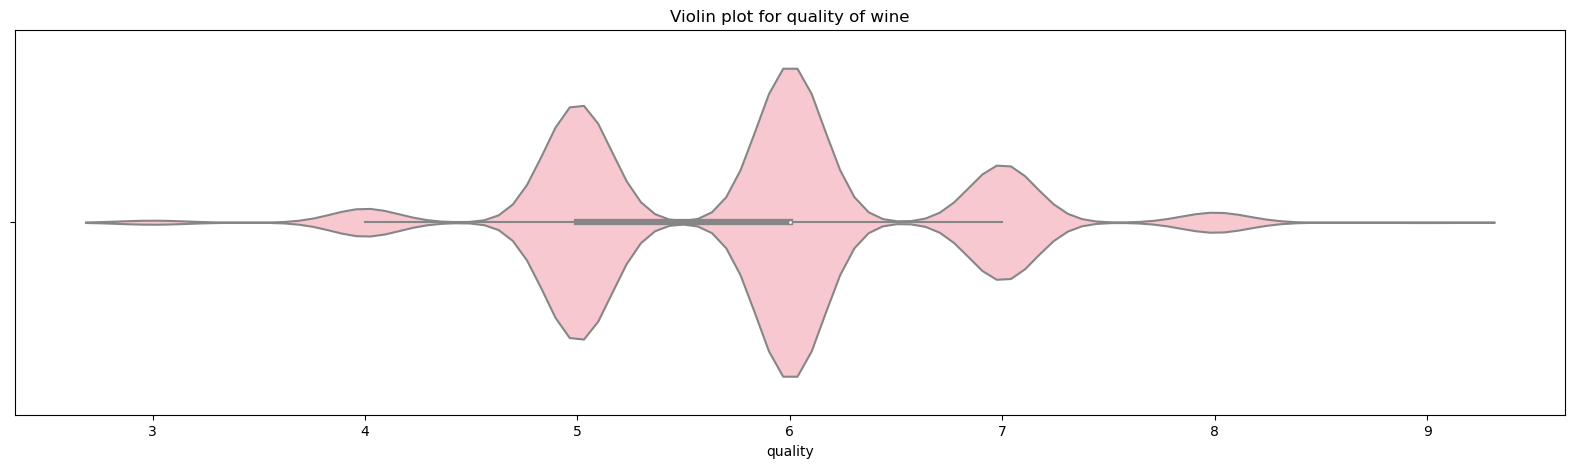

In [79]:
plt.figure(figsize=(20,5))
sns.violinplot(x=wine_df['quality'], color='pink')
plt.title('Violin plot for quality of wine')
plt.show()

In [80]:
# Interquartile range (IQR)

In [81]:
Q1 = wine_df['quality'].quantile(0.25)
Q2 = wine_df['quality'].quantile(0.50)
Q3 = wine_df['quality'].quantile(0.75)
print('Q1=', Q1, '\nQ2=', Q2, '\nQ3=', Q3)

Q1= 5.0 
Q2= 6.0 
Q3= 6.0


In [82]:
IQR=Q3-Q1
print('IQR=', IQR)

IQR= 1.0


In [83]:
min_whisker= Q1 - (1.5*IQR)
max_whisker= Q3 + (1.5*IQR)
print('Minimum whisker:', min_whisker, '\nMaximum whisker:', max_whisker)

Minimum whisker: 3.5 
Maximum whisker: 7.5


In [84]:
# Conclusion

- From the above observation, we can conclude that their is 1 outlier less than that of minimum whisker & around 2
  outliers whose value is greater than that of the maximum whiskers.

In [85]:
# Based on your anlysis either drop extreme values or substitute them with more acceptable value.

- As per observation, as their are very less outliers, we can drop this extreme values.

In [86]:
wine_df = wine_df[wine_df['quality']<7.5]
wine_df = wine_df[wine_df['quality']>3.5]
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.53,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: xlabel='quality'>

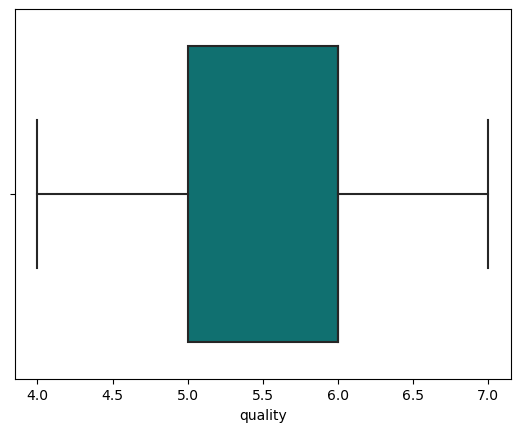

In [87]:
sns.boxplot(x=wine_df['quality'], color='teal')     # cross-verify

- Outliers have been removed.

## Part III) D) Handling Categorical Values

In [88]:
# Two types of categorical values : ordinal and nominal

    - In this case, we have only one catgorical column 'type' which is of nominal category.    

In [89]:
# Nominal values

In [90]:
# One-hot encoding

In [91]:
wine_df=pd.get_dummies(wine_df, columns=['type'])

In [92]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False,True
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,True,False
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,True,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.53,11.2,6,True,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,True,False


In [93]:
wine_df.replace({False:0, True:1}, inplace= True)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.53,11.2,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


- Low Cardinality: As type column has only 2 unique values, so it has low cardinality.

## Part III) E) Handling Numerical Values

In [94]:
# Whether the data is symmetrical or not.

In [95]:
wine_df['quality'].skew()

-0.03789561724750406

- As the above skew value is between -0.5 to 0.5, so it is symmetrical.

In [96]:
# Plot histogram plot.

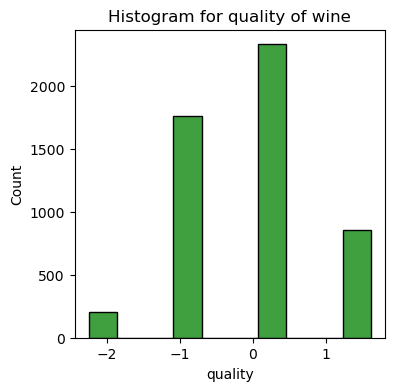

In [106]:
plt.figure(figsize=(4,4))
sns.histplot(wine_df['quality'],bins=10,color='green')
plt.title('Histogram for quality of wine')
plt.show()

In [ ]:
# Plot distribution plot.

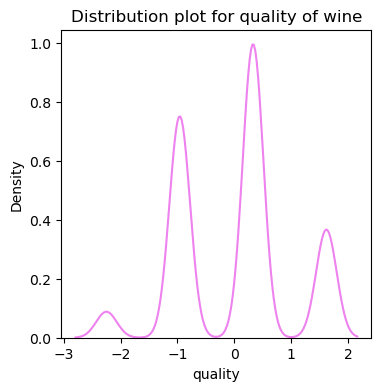

In [105]:
plt.figure(figsize=(4,4))
sns.kdeplot(wine_df['quality'],color='violet')
plt.title('Distribution plot for quality of wine')
plt.show()

In [98]:
# If your data is not skewed and symmetrical apply standard scaler.

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
wine_df[['quality','alcohol']]=scaler.fit_transform(wine_df[['quality', 'alcohol']])

In [100]:
# Confirm the distribution patter by plotting histogram and distribution plot again.

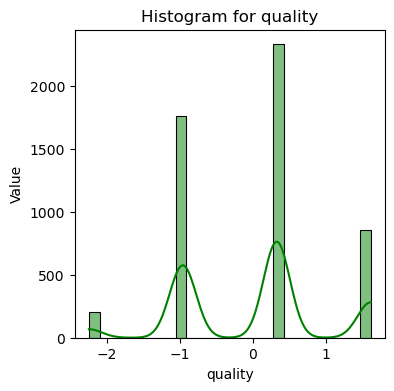

In [101]:
# Quality
plt.figure(figsize=(4,4))
sns.histplot(x=wine_df['quality'],kde=True, color='green')
plt.title('Histogram for quality')
plt.ylabel('Value')
plt.show()

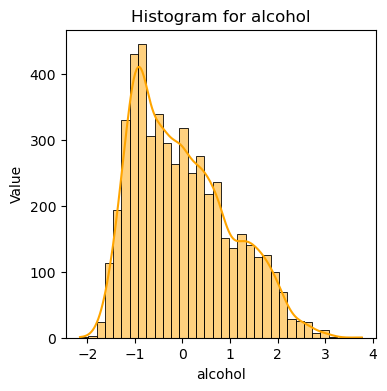

In [102]:
# Alcohol
plt.figure(figsize=(4,4))
sns.histplot(x=wine_df['alcohol'],kde=True,color='orange')
plt.title('Histogram for alcohol')
plt.ylabel('Value')
plt.show()

In [103]:
# Conclusion 

- From the above observation, we can say that **quality** column is symetrical as it's skew value is -0.03 which is not 
  between -0.5 to 0.5.